# Matematický software 

## Cv. 12 - Obyčejné diferenciální rovnice

Prezentace 1: [POSEL](MS12_soubory/Ode.pdf)

Prezentace 2: [POSEL](MS12_soubory/Ode2.pdf)

### Lorem

In [ ]:
!python -m pip install scipy

In [ ]:
!python -m pip install sympy

In [10]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sympy

#### Cvičení - řešení rovnice

<img src="MS12_soubory/rovnice.png" alt="Drawing" style="width: 650px;"/>


In [ ]:
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

x = symbols('x')
y = symbols('y', cls=Function)

eq = Eq(y(x).diff(x), x)
sol = dsolve(eq, hint='1st_linear', ics={y(0): 2})

print(sol)
plot(sol.rhs,(x,0,10))

x:[0 1 2 3 4 5 6 7 8 9]
y:[ 2.  2.  3.  5.  8. 12. 17. 23. 30. 38.]


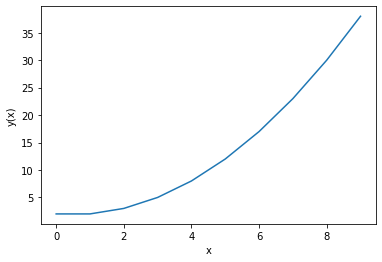

In [20]:
def odeEuler(f,y0,x):
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(0,len(x)-1):
        y[i+1] = y[i] + f(y[i],x[i])*(x[i+1] - x[i])
    return y

x0 = 0
y0 = 2
xmax = 10
dx = 1

x = np.arange(x0, xmax, dx)
y = odeEuler(lambda y,x: x, y0, x)

print(f"x:{x}\ny:{y}")
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

In [ ]:
from scipy.integrate import odeint

def model(y, x):
    dydx = x
    return dydx

x0 = 0
y0 = 2
xmax = 10
dx = 1

x = np.arange(x0, xmax, dx)
y = odeint(model, y0, x)

print(f"x:{x}\ny:{y}")
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

#### Cvičení - Verhulstův populační model

<img src="MS12_soubory/verhulst.png" alt="Drawing" style="width: 600px;"/>


Eq(N(t), 50/(1 + 49*exp(-2*t)))


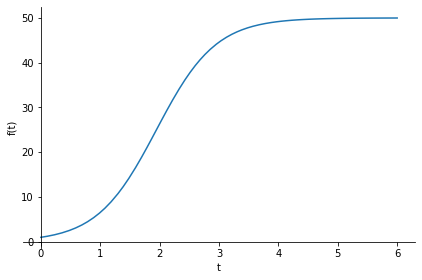

In [27]:
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

t = symbols('t')
r, K = symbols('r K', integers=True)
N = symbols('N', cls=Function)

r = 2
K = 50

eq = Eq(N(t).diff(t), r*N(t)*(1-N(t)/K))
sol = dsolve(eq, ics={N(0): 1})

print(sol)
plot(sol.rhs,(t,0,6))

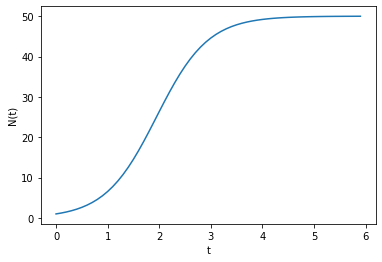

In [22]:
from scipy.integrate import odeint

def model(N, t, r, K):
    dNdt = r*N*(1-N/K)
    return dNdt

t0 = 0
N0 = 1
tmax = 6
dt = 0.1
r = 2
K = 50

t = np.arange(t0, tmax, dt)
N = odeint(model, N0, t, args=(r, K))

plt.plot(t,N)
plt.xlabel('t')
plt.ylabel('N(t)')
plt.show()

#### Cvičení - Nucené kmitání

<img src="MS12_soubory/kmitani.png" alt="Drawing" style="width: 600px;"/>



Eq(x(t), (0.387852901094025*sin(0.99968745115661*t) + 2.82726563195307*cos(0.99968745115661*t))*exp(-0.025*t) - 3.30717769425721*sin(0.63*t) + 0.172734368046928*cos(0.63*t))


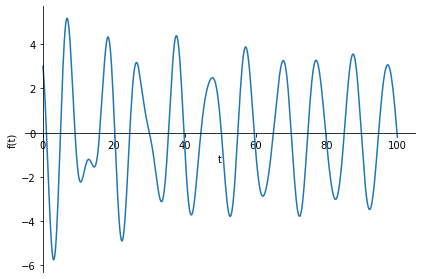

In [89]:
from sympy import Function, dsolve, Eq, symbols
from sympy.plotting import plot

t, omega, beta, Omega, F0 = symbols('t omega beta Omega F0')
x = symbols('x', cls=Function)

x0=3.0
v0=0.0
omega=1.0
beta=0.05
Omega=0.63
F0=2.0

eq = Eq(x(t).diff(t, t), -omega*x(t) -beta*x(t).diff(t) - F0*sympy.sin(Omega*t))
sol = dsolve(eq, ics={x(0): x0, x(1): v0})

print(sol)
plot(sol.rhs,(t,0,100))

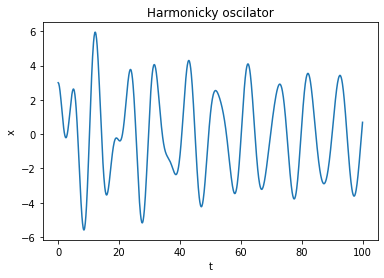

In [94]:
def tlumene_kmitani(x0, v0, omega, beta, Omega, F0):

    def dUdt(U, t, omega, beta, Omega, F0):
        #U[0] = x
        #U[1] = v = dx/dt
        return [U[1], -omega*U[0] - beta*U[1] + F0*np.sin(Omega*t)]

    U0 = [x0, v0]
    t = np.linspace(0, 100, 1000)
    U = odeint(dUdt, U0, t, args=(omega, beta, Omega, F0)) #funkce vraci [v=dx/dt, a=dv/dt=d2x/dt2]
    x = U[:,0] #ziskani x v danych casech z nascitanych v=dx/dt

    plt.xlabel("t")
    plt.ylabel("x")
    plt.title("Harmonicky oscilator")
    plt.plot(t, x)

#omega = uhlova frekvence vlastniho kmitani
#beta = utlum vlastniho kmitani
#Omega = uhlova frekvence budici sily
#F0 = amplituda budici sily
#x0 = pocatecni vychylka vlastniho kmitani
#v0 = pocatecni rychlost vlastniho kmitani
tlumene_kmitani(x0=3.0, v0=0.0, omega=1.0, beta=0.05, Omega=0.63, F0=2.0)

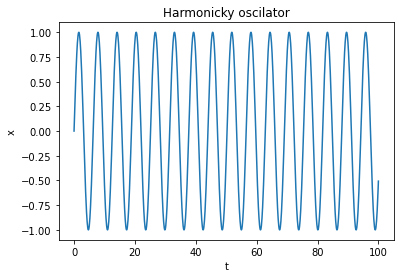

In [95]:
#netlumene kmitani (oscilator nenarazi do molekul prostredi a neztraci energii)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=0.0, F0=0.0)

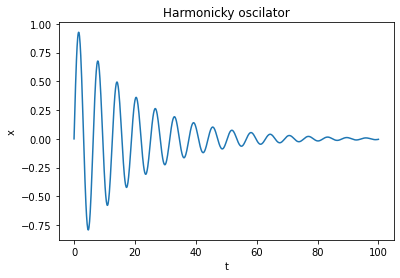

In [96]:
#tlumene kmitani nebuzene (oscilator narazi do molekul prostredi a ztraci energii)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.1, Omega=0.0, F0=0.0)

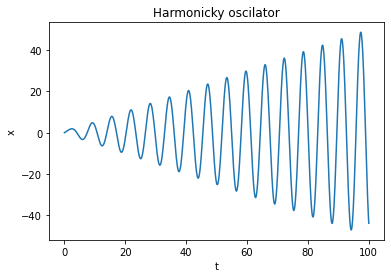

In [97]:
#netlumene kmitani buzene (oscilator nepredava energii, ale naopak ji ziskava od synchronizovane budici sily)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=1.0, F0=1.0)

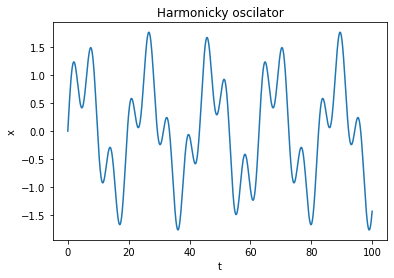

In [98]:
#netlumene kmitani buzene (oscilator nepredava energii, ale naopak ji ziskava od nesynchronizovane budici sily)
tlumene_kmitani(x0=0.0, v0=1.0, omega=1.0, beta=0.0, Omega=0.3, F0=1.0)

#### Cvičení - Vektorové pole

<img src="MS12_soubory/vecpole.png" alt="Drawing" style="width: 600px;"/>



y0:-5 Eq(y_sym(x_sym), -x_sym - 4*exp(x_sym) - 1)
y0:-3 Eq(y_sym(x_sym), -x_sym - 2*exp(x_sym) - 1)
y0:0 Eq(y_sym(x_sym), -x_sym + exp(x_sym) - 1)
y0:3 Eq(y_sym(x_sym), -x_sym + 4*exp(x_sym) - 1)
y0:5 Eq(y_sym(x_sym), -x_sym + 6*exp(x_sym) - 1)


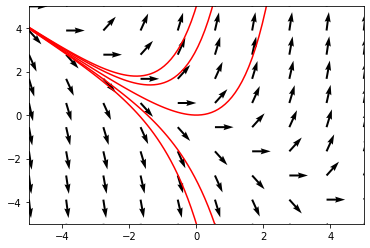

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, symbols, lambdify

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)
plt.ylim(xymin, xymax)

#reseni diferencialni rovnice
x = np.linspace(xymin, xymax, 100)
y0s = [-5, -3, 0, 3, 5]
x_sym = symbols('x_sym')
y_sym = symbols('y_sym', cls=Function)
eq = Eq(y_sym(x_sym).diff(x_sym), x_sym+y_sym(x_sym))
for y0 in y0s:
    sol = dsolve(eq, ics={y_sym(0): y0})
    print(f"y0:{y0}", sol)
    y = lambdify(x_sym, sol.rhs)
    plt.plot(x, y(x), "r-")

#vektorove pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = X + Y
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

y0:-5 Eq(y_sym(x_sym), -sqrt(25 - x_sym**2))
y0:-3 Eq(y_sym(x_sym), -sqrt(9 - x_sym**2))


<lambdifygenerated-49>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(9 - x_sym**2)


y0:1 Eq(y_sym(x_sym), sqrt(1 - x_sym**2))


<lambdifygenerated-50>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(1 - x_sym**2)


y0:3 Eq(y_sym(x_sym), sqrt(9 - x_sym**2))


<lambdifygenerated-51>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(9 - x_sym**2)


y0:5 Eq(y_sym(x_sym), sqrt(25 - x_sym**2))


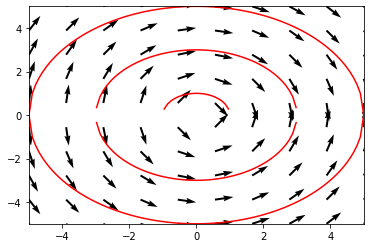

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, dsolve, Eq, symbols, lambdify

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)
plt.ylim(xymin, xymax)

#reseni diferencialni rovnice
x = np.linspace(xymin, xymax, 100)
y0s = [-5, -3, 1, 3, 5]
x_sym = symbols('x_sym')
y_sym = symbols('y_sym', cls=Function)
eq = Eq(y_sym(x_sym).diff(x_sym), -x_sym/y_sym(x_sym))
for y0 in y0s:
    sol = dsolve(eq, ics={y_sym(0): y0})
    print(f"y0:{y0}", sol)
    y = lambdify(x_sym, sol.rhs)
    plt.plot(x, y(x), "r-")

#vektorove pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = -X/Y
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

c:\Users\pavelberanek91\ws\matematicky-software\matematicky-software\.venv\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\pavelberanek91\ws\matematicky-software\matematicky-software\.venv\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\pavelberanek91\ws\matematicky-software\matematicky-software\.venv\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\pavelberanek91\ws\matematicky-software\matematicky-software\.venv\lib\site-packages\scipy\inte

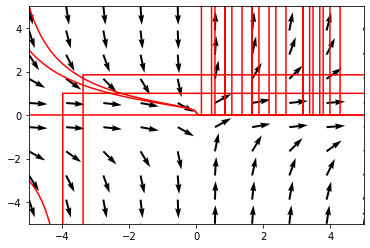

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#sympy uplne selze pri reseni teto rovnice :)

def model(y, x):
    dydx = y**2/x
    return dydx

xymin = -5
xymax = 5
plt.xlim(xymin, xymax)
plt.ylim(xymin, xymax)

#reseni diferencialni rovnice
x = np.linspace(xymin, xymax, 100)
y0s = [-5, -3, 0, 3, 5]
for y0 in y0s:
    y = odeint(model, y0, x)
    plt.plot(x, y, "r-")

#vektorove pole
nvec_on_row = 10
X,Y = np.meshgrid(np.linspace(xymin, xymax, nvec_on_row),np.linspace(xymin, xymax, nvec_on_row))
U = 1
V = Y**2/X
norm = np.sqrt(U**2 + V**2)
U /= norm
V /= norm
plt.quiver(X,Y,U,V)

plt.show()

#### Eulerova metoda

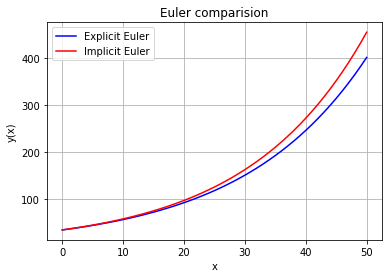

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def explicit_euler(f, xmin, xmax, dx, y0, label):
    x = np.arange(xmin, xmax+dx, dx)
    yexpl = np.zeros(len(x))
    yexpl[0] = y0
    for i in range(0, len(x) - 1):
        yexpl[i+1] = yexpl[i] + dx*f(x[i], yexpl[i])
    plt.plot(x, yexpl, 'b-', label=label)
    return yexpl
    

def implicit_euler(f, xmin, xmax, dx, y0, label):

    def fixed_point_iteration(f, yi, xi_next, dx, niterations):
        yi_next = yi
        for i in range(niterations):
            yi_next = yi + dx*f(xi_next, yi_next)
        return yi_next

    x = np.arange(xmin, xmax+dx, dx)
    yimpl = np.zeros(len(x))
    yimpl[0] = y0
    for i in range(0, len(x) - 1):
        yi_next = fixed_point_iteration(f, yimpl[i], x[i+1], dx, 10) # = yimpl[i+1] aprox
        yimpl[i+1] = yimpl[i] + dx*f(x[i+1], yi_next)
    plt.plot(x, yimpl, 'r-', label=label)
    return yimpl


explicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Explicit Euler")
implicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Implicit Euler")

plt.title('Euler comparision')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend()
plt.show()

#### Cvičení - Euler

<img src="MS12_soubory/stiff.png" alt="Drawing" style="width: 600px;"/>

In [ ]:
explicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Explicit Euler")
implicit_euler(f=lambda x, y: 0.05*y, xmin=0, xmax=50, dx=1, y0=35, label="Implicit Euler")

plt.title('Euler comparision')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.legend()
plt.show()

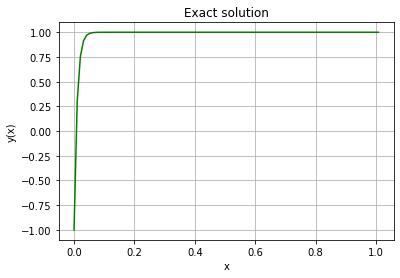

In [71]:
xmin=0
xmax=1
dx=0.0105

x = np.arange(xmin, xmax+dx, dx)
f_exact = lambda x: 1 - 2*np.exp(-100*x)
y_exact = f_exact(x)

plt.plot(x, y_exact, 'g-')

plt.title('Exact solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

Global error:  1.1718665216162698


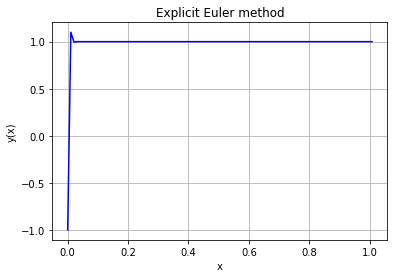

In [72]:
y_expl = explicit_euler(f=lambda x, y: -100*y + 100, xmin=0, 
            xmax=1, dx=0.0105, y0=-1, label="Explicit Euler")

print("Global error: ", np.sum(np.abs(y_exact - y_expl)))

plt.title('Explicit Euler method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

Global error:  1.7876131253665077


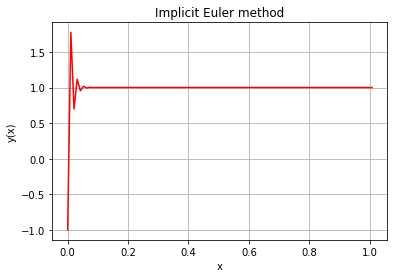

In [73]:
y_impl = implicit_euler(f=lambda x, y: -100*y + 100, xmin=0, 
            xmax=1, dx=0.0105, y0=-1, label="Explicit Euler")

print("Global error: ", np.sum(np.abs(y_exact - y_impl)))

plt.title('Implicit Euler method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

#### Stiff ODE solver

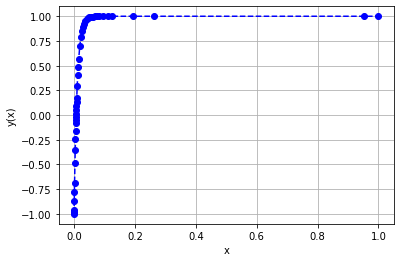

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def model(x, y):
    return -100*y + 100

y0 = -1
xmin = 0
xmax = 1

sol = solve_ivp(model, [xmin, xmax], [y0], method='BDF', first_step =0.0001, dense_output=True)

plt.plot(sol.t, sol.y[0], 'bo--')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid()
plt.show()

#### Cvičení - Stiff

<img src="MS12_soubory/stiff2.png" alt="Drawing" style="width: 600px;"/>

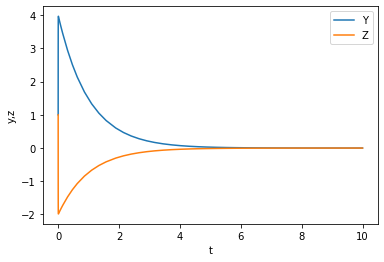

In [36]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def deriv(t, k):
    y, z = k
    dy = 998*y + 1998*z
    dz = -999*y - 1999*z
    return dy, dz

xmin, xmax = 0, 10

y0 = 1
z0 = 1
k = y0, z0

soln = solve_ivp(deriv, (xmin, xmax), k, method='BDF', first_step =0.0001, dense_output=True)

plt.plot(soln.t, soln.y[0], label='Y')
plt.plot(soln.t, soln.y[1], label='Z')
plt.xlabel('t')
plt.ylabel('y,z')
plt.legend()
plt.show()

#### Chemický model - chemická kinetika

<img src="MS12_soubory/kinetika.png" alt="Drawing" style="width: 600px;"/>



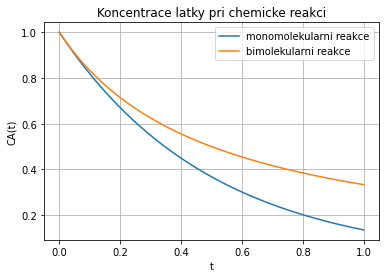

In [88]:
tmin=0
tmax=1
dt = 0.01
t = np.arange(tmin, tmax+dt, dt)

k = 2
CA0 = 1

f_mono = lambda t,k,CA0: CA0*np.exp(-k*t)
CA_mono = f_mono(t,k, CA0)

f_bi = lambda t,k,CA0: CA0/(1+CA0*k*t)
CA_bi = f_bi(t,k, CA0)

plt.plot(t, CA_mono, label="monomolekularni reakce")
plt.plot(t, CA_bi, label="bimolekularni reakce")

plt.title('Koncentrace latky pri chemicke reakci')
plt.xlabel('t')
plt.ylabel('CA(t)')
plt.grid()
plt.legend()
plt.show()

#### Biologický model - šíření nemocí s konstantní infekčností

<img src="MS12_soubory/nemoc.png" alt="Drawing" style="width: 600px;"/>



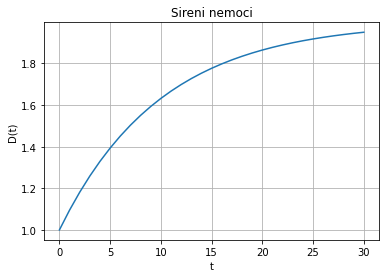

In [82]:
tmin=0
tmax=30
dt = 1

b = 0.1
a = 0.2
D0 = 1
C = -np.log(a-b*D0)/b

t = np.arange(tmin, tmax+dt, dt)
f = lambda t,a,b,C: 1/b*(a-np.exp(-b*(C+t)))
D = f(t, a, b, C)

plt.plot(t, D)

plt.title('Pocet nakazenych jedincu')
plt.xlabel('t')
plt.ylabel('D(t)')
plt.grid()
plt.show()

#### Ekonomický model - spotřeba domácností

<img src="MS12_soubory/domacnost.png" alt="Drawing" style="width: 600px;"/>



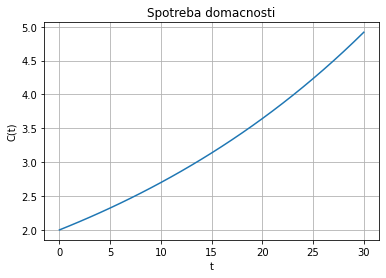

In [80]:
tmin=0
tmax=30
dt = 1

k = 0.03
c = 2

t = np.arange(tmin, tmax+dt, dt)
f = lambda t,c,k: c*np.exp(k*t)
C = f(t, c, k)

plt.plot(t, C)

plt.title('Spotreba domacnosti')
plt.xlabel('t')
plt.ylabel('C(t)')
plt.grid()
plt.show()

#### Cvičení - ODE 2. řádu

<img src="MS12_soubory/ode.png" alt="Drawing" style="width: 600px;"/>



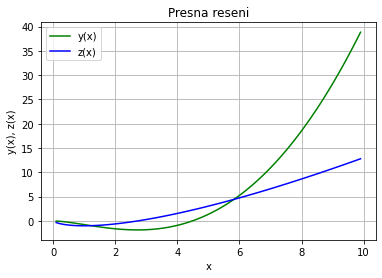

In [17]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 0
xmax = 10
dx = 0.1
x = np.arange(xmin, xmax, dx)

y = lambda x: x**2/2*(np.log(x)-3/2)
z = lambda x, c: x*np.log(x) - x + c

c = 0
plt.plot(x, y(x), 'g-', label="y(x)")
plt.plot(x, z(x, c), 'b-', label="z(x)")
plt.title('Presna reseni')
plt.xlabel('x')
plt.ylabel('y(x), z(x)')
plt.grid()
plt.legend()
plt.show()

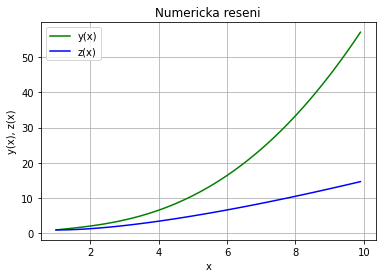

In [30]:
import numpy as np
import matplotlib.pyplot as plt

xmin = 1
xmax = 10
dx = 0.1
x = np.arange(xmin, xmax, dx)
y = np.zeros(len(x))
z = np.zeros(len(x))

y[0] = 1
z[0] = 1

fy = lambda z: z
fz = lambda x: np.log(x)

for i in range(0, len(x) - 1):
    y[i+1] = y[i] + dx*fy(z[i])
    z[i+1] = z[i] + dx*fz(x[i])

plt.plot(x, y, 'g-', label='y(x)')
plt.plot(x, z, 'b-', label='z(x)')
plt.title('Numericka reseni')
plt.xlabel('x')
plt.ylabel('y(x), z(x)')
plt.grid()
plt.legend()
plt.show()


#### Zombie apokalypsa

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html

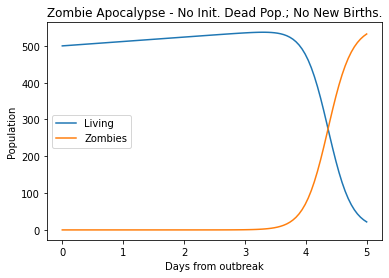

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1873
    # data points      = 13
    # variables        = 5
    chi-square         = 194469.087
    reduced chi-square = 24308.6358
    Akaike info crit   = 134.970029
    Bayesian info crit = 137.794776
##  Warning: uncertainties could not be estimated:
    P:   at boundary
    B:   at initial value
    B:   at boundary
    A:   at boundary
[[Variables]]
    S0:  506.455828 (init = 500)
    Z0:  0 (fixed)
    R0:  0 (fixed)
    P:   12.0000000 (init = 10)
    d:   3.6016e-05 (init = 0.0005)
    B:   0.01000000 (init = 0.01)
    G:   0.0001 (fixed)
    A:   1.0000e-05 (init = 0.0005)


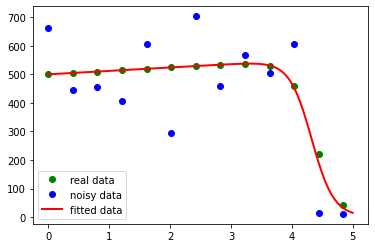

In [4]:
# zombie apocalypse modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint


# solve the system dy/dt = f(y, t)
def f(y, t, paras):

    Si = y[0]
    Zi = y[1]
    Ri = y[2]

    try:
        P = paras['P'].value
        d = paras['d'].value
        B = paras['B'].value
        G = paras['G'].value
        A = paras['A'].value

    except:
        P, d, B, G, A = paras
    # the model equations (see Munz et al. 2009)
    f0 = P - B * Si * Zi - d * Si
    f1 = B * Si * Zi + G * Ri - A * Si * Zi
    f2 = d * Si + A * Si * Zi - G * Ri
    return [f0, f1, f2]


def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,p) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x


def residual(paras, t, data):
    x0 = paras['S0'].value, paras['Z0'].value, paras['R0'].value
    model = g(t, x0, paras)
    s_model = model[:, 0]
    return (s_model - data).ravel()

# just for reproducibility reasons
np.random.seed(1)

# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0]     # initial condition vector
t = np.linspace(0, 5., 100)         # time grid

P = 12      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the DEs
soln = odeint(f, y0, t, args=((P, d, B, G, A), ))
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)
plt.show()

# generate fake data
S_real = S[0::8]
S_measured = S_real + np.random.randn(len(S_real)) * 100
t_measured = t[0::8]

plt.figure()
plt.plot(t_measured, S_real, 'o', color='g', label='real data')

# add some noise to your data to mimic measurement erros
plt.plot(t_measured, S_measured, 'o', color='b', label='noisy data')

# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()
params.add('S0', value=S0, min=490., max=510.)
params.add('Z0', value=Z0, vary=False)
params.add('R0', value=R0, vary=False)
params.add('P', value=10, min=8., max=12.)
params.add('d', value=0.0005, min=0.00001, max=0.005)
params.add('B', value=0.01, min=0.00001, max=0.01)
params.add('G', value=G, vary=False)
params.add('A', value=0.0005, min=0.00001, max=0.001)

# fit model
result = minimize(residual, params, args=(t_measured, S_measured), method='leastsq')  # leastsq nelder
# check results of the fit
data_fitted = g(t, y0, result.params)

plt.plot(t, data_fitted[:, 0], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
# display fitted statistics
report_fit(result)

plt.show()